# Processamento de Dados
___

In [1]:
import os 
import sys
from pathlib import Path 
sys.path.insert(1 ,os.path.dirname(Path(os.path.abspath("__file__")).resolve().parent))

import folium
import pickle
import numpy as np
import pandas as pd
from geopy import Point, Nominatim
from geopy.distance import geodesic
import itertools 

from config.params import params
from src.places_api import PlacesAPI
from src.data_process import *

## Demanda

In [2]:
raw_demand = pd.read_csv("../data/raw/saopauloln1_demand.csv")

raw_demand = raw_demand.loc[raw_demand["demand"] > 0, ['to', 'demand']].sort_values(by="to").reset_index(drop=True).copy()
raw_demand.rename(columns={"to": "Cliente", "demand": "Demanda"}, inplace=True)
raw_demand["Cliente"] = raw_demand["Cliente"].astype(str)
raw_demand["Cliente"] = "C"+raw_demand["Cliente"]
raw_demand = raw_demand.groupby(by=["Cliente"], as_index=False, dropna=False).agg({"Demanda": "sum"})
raw_demand = raw_demand.loc[raw_demand["Demanda"] > 0].copy()
#raw_demand = raw_demand.iloc[:10].copy()

raw_demand = raw_demand[["Cliente", "Demanda"]].copy()
raw_demand.to_csv("../data/input/customer_demand.csv", index=False, sep=";", decimal=".")
raw_demand

,Cliente,Demanda
0,C1,35.73
1,C10,21.42
2,C100,16.67
3,C101,111.97
4,C102,35.73
...,...,...
319,C94,26.20
320,C95,30.96
321,C97,9.52
322,C98,2.38


## Localizações

In [3]:
raw_nodes = pd.read_csv("../data/raw/saopauloln1_nodes.csv")
raw_nodes.drop(columns=["terminal"], inplace=True)
raw_nodes.rename(columns={"id": "ID", "lat": "Latitude", "lon": "Longitude"}, inplace=True)
raw_nodes["ID"] = "C"+raw_nodes["ID"].astype(str)
raw_nodes["Tipo"] = "Cliente"

raw_nodes.to_csv("../data/input/customer_location.csv", index=False, sep=";", decimal=".")
raw_nodes

,ID,Latitude,Longitude,Tipo
0,C1,-23.555544,-46.663066,Cliente
1,C2,-23.558080,-46.660255,Cliente
2,C3,-23.561782,-46.656005,Cliente
3,C4,-23.567471,-46.649014,Cliente
4,C5,-23.579056,-46.661421,Cliente
...,...,...,...,...
338,C343,-23.525540,-46.671556,Cliente
339,C344,-23.538907,-46.607219,Cliente
340,C345,-23.543500,-46.590097,Cliente
341,C346,-23.547064,-46.646023,Cliente


In [4]:
total_response = get_charging_stations()
df = process_data(total_response)
df

/Users/lucasedmundo/Documents/Github/EVRP/src/data_process.py:59: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Potência de Recarga"] = df["Potência de Recarga"].fillna(df["Potência de Recarga"].mean())


,ID,Latitude,Longitude,Tipo,Potência de Recarga
0,R1,-23.571065,-46.647016,Estação de Recarga,22
1,R2,-23.548067,-46.756977,Estação de Recarga,67
2,R3,-23.534579,-46.830573,Estação de Recarga,67
3,R4,-23.509526,-46.911138,Estação de Recarga,120
4,R5,-23.462344,-46.876140,Estação de Recarga,67
5,R6,-23.509526,-46.911138,Estação de Recarga,67
6,R7,-23.509526,-46.911138,Estação de Recarga,67
7,R8,-23.623130,-46.969139,Estação de Recarga,67
8,R9,-23.646717,-46.882458,Estação de Recarga,67
9,R10,-23.615346,-46.776264,Estação de Recarga,67


In [5]:
df_plot = pd.merge(
    raw_nodes, raw_demand, how="left",
    right_on="Cliente", left_on="ID"
)
df_plot = df_plot.groupby(["ID", "Latitude", "Longitude", "Tipo"]).agg({"Demanda": "sum"}).reset_index()
df_plot["Demanda"] = df_plot["Demanda"].fillna(0)


In [6]:
from src.CoG import calculate_center_of_gravity

cog = df_plot[['Latitude', 'Longitude', 'Demanda']].to_records('list').tolist()
cog = [(row[1], row[2], row[3]) for row in cog]
calculate_center_of_gravity(cog)


(-23.59719325641428, -46.64009486192702)

In [7]:
df_plot = pd.concat([df_plot, df], ignore_index=True)
df_plot

,ID,Latitude,Longitude,Tipo,Demanda,Potência de Recarga
0,C1,-23.555544,-46.663066,Cliente,35.73,NaN
1,C10,-23.553282,-46.672525,Cliente,21.42,NaN
2,C100,-23.644742,-46.703183,Cliente,16.67,NaN
3,C101,-23.644570,-46.726490,Cliente,111.97,NaN
4,C102,-23.653036,-46.680014,Cliente,35.73,NaN
...,...,...,...,...,...,...
374,R32,-23.626060,-46.579943,Estação de Recarga,NaN,22.0
375,R33,-23.694665,-46.612584,Estação de Recarga,NaN,67.0
376,R34,-23.663539,-46.507550,Estação de Recarga,NaN,22.0
377,R35,-23.569318,-46.437817,Estação de Recarga,NaN,60.0



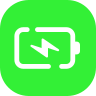
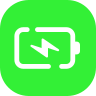
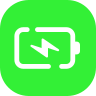
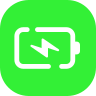
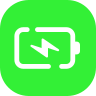
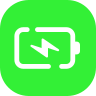
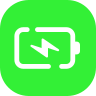
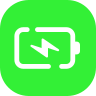
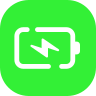
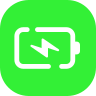
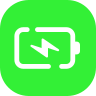
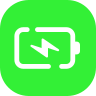
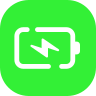
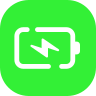
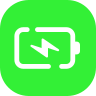
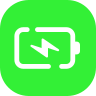
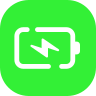
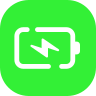
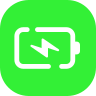
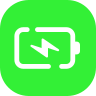
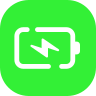
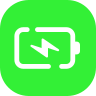
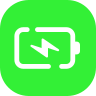
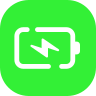
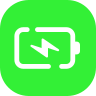
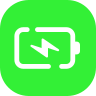
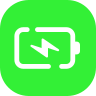
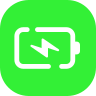
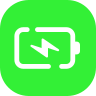
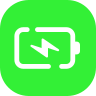
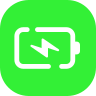
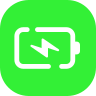
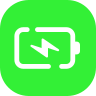
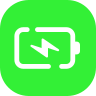
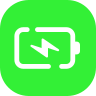
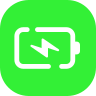

In [8]:
# Create a folium map centered around the average latitude and longitude
map_center = [df_plot['Latitude'].mean(), df_plot['Longitude'].mean()]
m = folium.Map(location=map_center, zoom_start=12)


for _, row in df_plot.loc[df_plot["Tipo"]=="Estação de Recarga"].iterrows():
    folium.Marker(
      location=(row['Latitude'], row['Longitude']),
      icon=folium.features.CustomIcon("../resources/Ponto de Recarga.png",icon_size=(15,15)),
    ).add_to(m)
# Add circle markers for each customer
for _, row in df_plot.loc[df_plot["Tipo"]=="Cliente"].iterrows():
    folium.CircleMarker(
      location=(row['Latitude'], row['Longitude']),
      radius=row['Demanda']/25,
      color='blue',
      fill=True,
      fill_color='blue',
      fill_opacity=0.2
    ).add_to(m)


# Display the map
m

In [ ]:
\